In [5]:
from sklearn.svm import LinearSVC

class LinearSVCWithAA(LinearSVC):
    def __init__(self, learning_rate=1.0, alpha=0.1, n_iterations=10, verbose=False):        
        # Initialize the attributes of the LinearSVCWithAA class
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.verbose = verbose
        self.loss = []  # Add this line to store the loss values

#         # Initialize the coef_ attribute
# #         self.coef_ = None
#         self.coef_ = np.random.randn(5,)
    
#         # Initialize the coef_prev attribute
#         self.coef_prev = self.coef_
      
    
    
    def fit(self, X, y, n_iterations=100, alpha=0.1,learning_rate=0.1):
        """
        Fit the model to the training data.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            Training data.
        y : array-like, shape (n_samples,)
            Target labels.
        n_iterations : int
            Number of iterations to run the algorithm.
        alpha : float
            Anderson acceleration factor.
        """
        # Convert the labels to one-hot encoded labels
        y_one_hot = np.eye(np.max(y) + 1)[y]

        # Initialize the weight vector and the loss list
#         self.coef_ = np.random.randn(X.shape[1])
#         self.coef_ = np.random.randn(X.shape[1], len(np.unique(y)))
        self.coef_ = np.random.randn(X.shape[1], X.shape[1])
#         loss = []

        # Initialize the weight vector history
        coef_history = [self.coef_]

        # Run the Perceptron algorithm with Anderson acceleration
        for i in range(n_iterations):
            # Compute the gradient
            grad = self._gradient(X, y)

            # Add the updated weight vector to the history
            coef_history.append(self.coef_)

            # If we have enough past weight vectors, perform Anderson acceleration
            if len(coef_history) > 2:
                # Compute the difference between the current weight vector and the previous one
                diff = coef_history[-1] - coef_history[-2]

                # Update the current weight vector using Anderson acceleration
#                 print("self.coef_ ",self.coef_)
#                 print("self.coef_ ",self.coef_)
                self.coef_ += alpha * diff + grad[0]
            else:
                # Update the current weight vector using the gradient
#                 print("self.coef_ ",self.coef_)
#                 print("grad ",grad[0])
                self.coef_ += learning_rate * grad[0]

            # Compute the loss for this iteration
            y_pred = self.predict(X)
#             iter_loss = self.hinge_loss(y,y_pred)
#             iter_loss = np.maximum(0, 1 - y * y_pred)
#             print("iter_loss: ",iter_loss)
            #######################################################
            # Compute the loss for this sample
#             sample_loss = -np.sum(y * np.log(y_pred))
            # Increment the loss and the number of correct predictions for this iteration
#             iter_loss += int(sample_loss)
#             n_correct += int(np.argmax(y_pred) == np.argmax(y))
            # Compute the loss for this iteration
#             loss_value = np.maximum(0, 1 - y * y_pred) # hinge loss
            loss_value = self.cross_entropy_loss(y, y_pred)
#             print("Iteration: ", i, ", Loss: ",loss_value)
            self.loss.append(loss_value)
#             self.loss.append(iter_loss)
            #########################################################

            # Save the previous weight vector
            self.coef_prev = self.coef_

        # Save the number of iterations and the alpha value
        self.n_iterations_ = n_iterations
        self.alpha_ = alpha

    def cross_entropy_loss(self, y, y_pred):
        # Compute the loss for each sample
#         print("y length: ",len(y))
#         print("y_pred length: ",len(y_pred))
        sample_loss = -np.sum(y * np.log(y_pred + 1e-10))

        # Average the loss over the number of samples
        loss = np.mean(sample_loss)
#         print("sample_loss",sample_loss,", loss",loss)

        return loss


    def hinge_loss(self, X, y):
        # Compute the prediction for each sample
        y_pred = self.predict(X)
        
        # Compute the hinge loss for each sample
        loss = np.maximum(0, 1 - y * y_pred)
        
        return loss
    
    
    def predict(self, X):
#         # Compute the class scores for each sample
#         scores = np.dot(X, self.coef_.T)

#         # Predict the class for each sample
#         y_pred = np.argmax(scores)

#         return y_pred
    
        # Predict the class of each sample in X
        y_pred = np.dot(X, self.coef_)

        # Normalize the predictions
        y_pred = y_pred / np.sum(y_pred, axis=1, keepdims=True)

        # Return the predicted class for each sample
        return np.argmax(y_pred, axis=1)


    
    def _gradient(self, X, y):
        # Compute the prediction for each sample
        y_pred = self.predict(X)

        # Compute the gradient of the loss function with respect to the weight vector
        
        grad_coef = np.dot(X.T, np.maximum(0, 1 - y * y_pred))
        
        # Average the gradient over the number of samples
#         grad_coef /= len(X)
        grad_coef = np.divide(grad_coef, len(X))
        
        grad_coef = np.squeeze(grad_coef) ###################################################

        # Compute the gradient of the loss function with respect to the bias term
        grad_intercept = np.sum(np.maximum(0, 1 - y * y_pred)) / len(X)

        # Return the gradient as a tuple
        return (grad_coef, grad_intercept)
    
    
    


In [6]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.special import softmax
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.special import softmax
from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split

from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit

In [7]:
X = np.load("C:/Users/pchourasia1/Desktop/Anderson/data/pca_embeddings/spike/kmer_Frequency_Vector_7000_PCA_500.npy")
attribute_data = np.load("C:/Users/pchourasia1/Desktop/Anderson/data/pca_embeddings/spike/seq_data_variant_names_7000.npy")

In [9]:
# import csv

# items = []

# with open('C:/Users/pchourasia1/Desktop/tSNE-Evaluation/first_variant_name_data_7000.csv') as csvfile:    
# 	csvReader = csv.reader(csvfile)    
# 	for row in csvReader:        
# 		items.append(row[0])        
# print(len(items))

In [10]:
attr_new = []
for i in range(len(attribute_data)):
    aa = str(attribute_data[i]).replace("[","")
    aa_1 = aa.replace("]","")
    aa_2 = aa_1.replace("\'","")
    attr_new.append(aa_2)

unique_hst = list(np.unique(attr_new))

int_hosts = []
for ind_unique in range(len(attr_new)):
    variant_tmp = attr_new[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

y = np.array(int_hosts[:])

sss = ShuffleSplit(n_splits=1, test_size=0.3)

sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

# x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=68)


Attribute data preprocessing Done


In [11]:
# # Import the necessary libraries
# import numpy as np
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
# from scipy.special import softmax
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# # from sklearn.model_selection import train_test_split

# # # Split the data into training and test sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# n_classes = 2
# n_features = 11

# train_sample_size = 1000
# # Load the training data and labels
# X_train = np.random.randn(train_sample_size, n_features)
# y_train = np.random.randint(n_classes, size=train_sample_size)

# # Load the test data and labels
# testing_sample_size = 300
# X_test = np.random.randn(testing_sample_size, n_features)
# y_test = np.random.randint(n_classes, size=testing_sample_size)
# #############################################################################


In [28]:
# Train the model using the LinearSVCWithAA class
model = LinearSVCWithAA()
model.fit(X_train, y_train,n_iterations=10, learning_rate=0.1)

# Predict the classes of the test set
# y_pred = []
# for i in range(len(X_test)):
#     y_pred.append(model.predict(X_test[i]))

y_pred = model.predict(X_test)

# Compute the classification accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute the precision
precision = precisio
n_score(y_test, y_pred, average='macro')

# Compute the recall
recall = recall_score(y_test, y_pred, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.004285714285714286
Precision: 0.0010011123470522803
Recall: 0.006206896551724138


C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


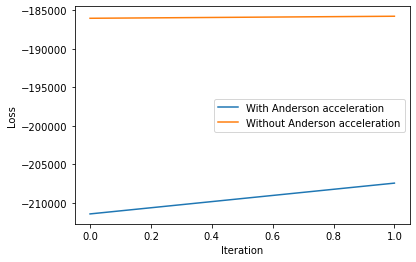

In [29]:
# Create a LinearSVCWithAA object with Anderson acceleration
learning_rate_val = 0.05
n_iterations_value = 2
svc_aa = LinearSVCWithAA(alpha=0.5, learning_rate=learning_rate_val)

# Create a LinearSVCWithAA object without Anderson acceleration
svc_no_aa = LinearSVCWithAA(alpha=0, learning_rate=learning_rate_val)

# Fit the models on the training data
svc_aa.fit(X_train, y_train,n_iterations=n_iterations_value, learning_rate=learning_rate_val)
svc_no_aa.fit(X_train, y_train,n_iterations=n_iterations_value, learning_rate=learning_rate_val)

# Plot the loss for the two models
plt.plot(svc_aa.loss, label='With Anderson acceleration')
plt.plot(svc_no_aa.loss, label='Without Anderson acceleration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
# plt.savefig("E:/RA/Anderson_Acceleration/Plots/SVM.png")
plt.show()


In [58]:
# svc_aa.loss